In [1]:
import gym
import gym_anytrading

from gym_anytrading.envs import TradingEnv, ForexEnv, StocksEnv, Actions, Positions 
from gym_anytrading.datasets import FOREX_EURUSD_1H_ASK, STOCKS_GOOGL
import matplotlib.pyplot as plt
from keras import applications
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten, Dropout, Input, Concatenate, Conv2D
from keras.optimizers import Adam

from rl.agents.dqn import DQNAgent
from rl.agents.ddpg import DDPGAgent
from rl.policy import BoltzmannQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.core import Processor
from rl.random import OrnsteinUhlenbeckProcess
from rl.callbacks import FileLogger, ModelIntervalCheckpoint, TrainIntervalLogger
from rl.processors import WhiteningNormalizerProcessor

from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

import json
import numpy as np

Using TensorFlow backend.
d:\tech\mtech\sls\project2\env\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\tech\mtech\sls\project2\env\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\tech\mtech\sls\project2\env\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\tech\mtech\sls\project2\env\lib\site-packages\tensorflow\py

In [2]:
def env_creator():
    return gym.make('forex-v0', frame_bound=(50, 5000), window_size=10)

env = env_creator()
nb_actions = env.action_space.n

def buildModel():
    # Next, we build a very simple model.
    model = Sequential()

    #model.add(Conv2D(input_shape=(1,10,2), filters=32, kernel_size=(4,2), padding='same'))
    #model.add(Conv2D(filters=64, kernel_size=(4,2), padding='same'))
    #model.add(Conv2D(filters=128, kernel_size=(4,2), padding='same'))
    #model.add(Conv2D(filters=128, kernel_size=(4,2), padding='same'))
    #model.add(Flatten())
    model.add(Flatten(input_shape=(1,10,2)))
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(1024, activation='relu'))
    model.add(Dense(nb_actions, activation='linear'))
    return model
buildModel().summary()
def agent_creator():
    #processor = EnvProcessor()
    processor = WhiteningNormalizerProcessor()
    memory = SequentialMemory(limit=1024, window_length=1)
    #policy = EpsGreedyQPolicy()
    policy = BoltzmannQPolicy()
    agent = DQNAgent(model=buildModel(), nb_actions=nb_actions, memory=memory, nb_steps_warmup=128, policy=policy, batch_size=64, processor=processor, 
                   target_model_update=1e-2, train_interval=32, enable_double_dqn=False)
    agent.compile(Adam(lr=0.01), metrics=['mae'])
    return agent

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              21504     
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 2050      
Total params: 2,122,754
Trainable params: 2,122,754
Non-trainable params: 0
_________________________________________________________________


starting train 1
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
155/989 [===>..........................] - ETA: 5s - reward: -0.5368 - cumulative_reward: -105.7826WARNING:tensorflow:From d:\tech\mtech\sls\project2\env\lib\site-packages\tensorflow\python\ops\math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.
989/989 [==============================] - 44s 45ms/step - reward: -10.5246 - cumulative_reward: -86.0412
train 1 completed. took 45.986 seconds, total_reward: -24.299999999871922 total_profit: 0.739771395614826
min reward: -191.5, max reward: 123.29999999999953, mean_reward: -0.004910082844993316


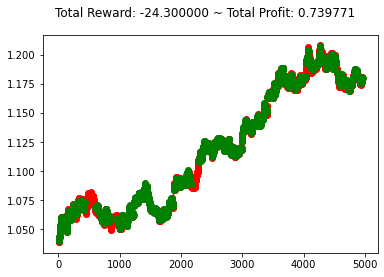

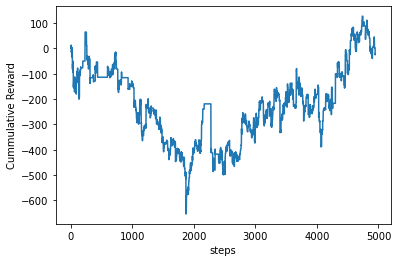

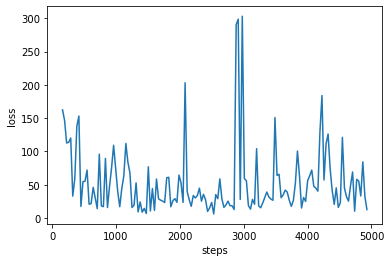

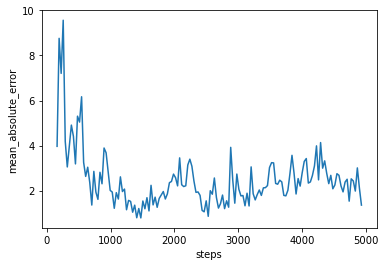

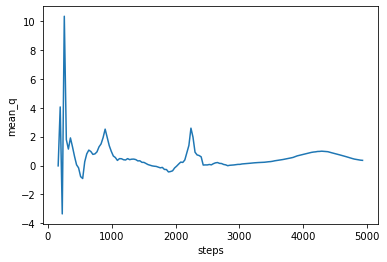

starting train 2
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 45s 46ms/step - reward: -11.0794 - cumulative_reward: 288.2792
train 2 completed. took 95.156 seconds, total_reward: 1010.1999999999824 total_profit: 0.7748181805044937
min reward: -188.70000000000164, max reward: 128.29999999999896, mean_reward: 0.20412204485754343


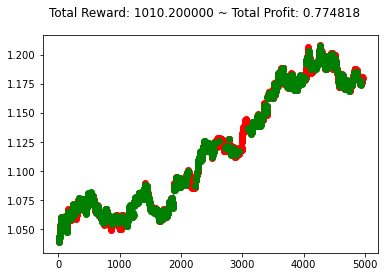

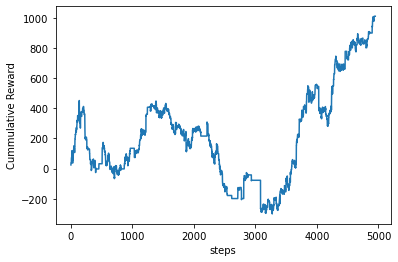

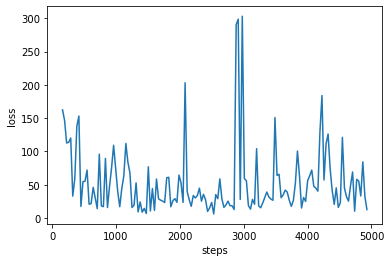

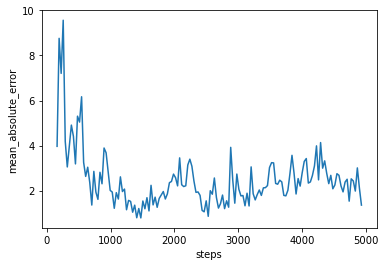

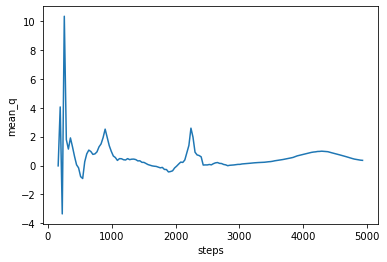

starting train 3
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 47s 47ms/step - reward: -14.7009 - cumulative_reward: 80.5268
train 3 completed. took 146.242 seconds, total_reward: 296.0000000001333 total_profit: 0.7587259952873847
min reward: -118.00000000000033, max reward: 261.5999999999996, mean_reward: 0.05981006263894389


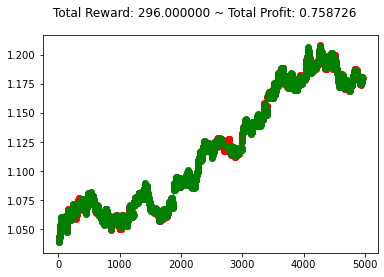

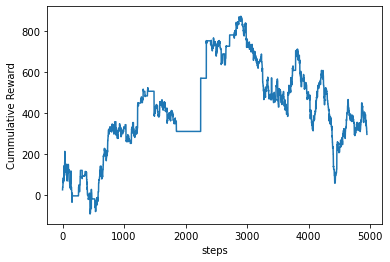

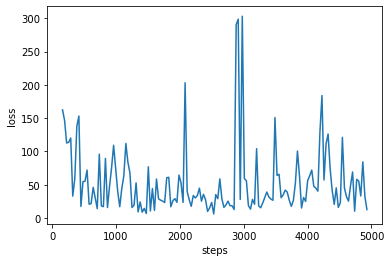

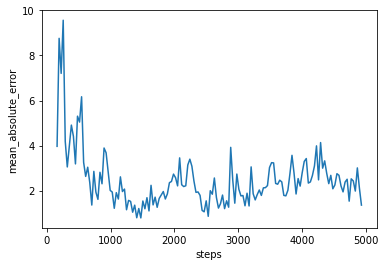

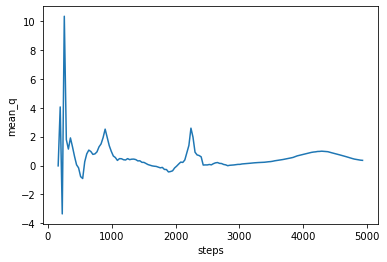

starting train 4
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 48s 48ms/step - reward: 33.4971 - cumulative_reward: -301.5354: 1:12 - reward: 90
train 4 completed. took 198.127 seconds, total_reward: -794.7000000000702 total_profit: 0.6813921497031478
min reward: -191.59999999999843, max reward: 121.6000000000017, mean_reward: -0.16057789452416046


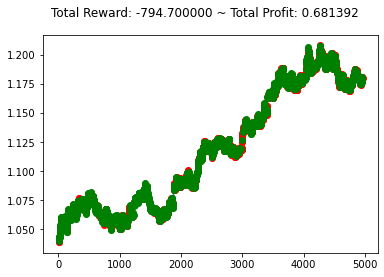

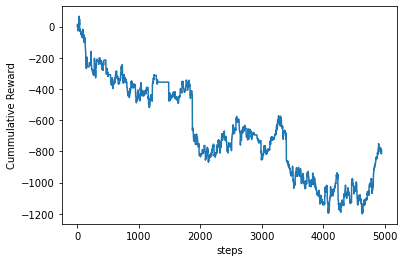

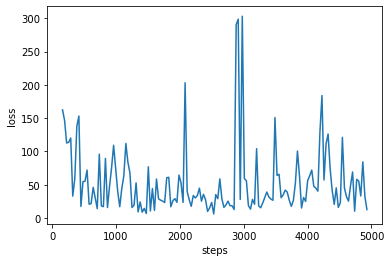

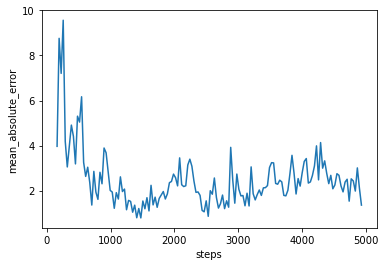

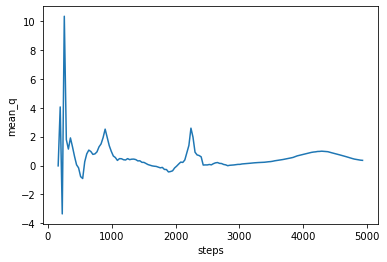

starting train 5
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 50s 50ms/step - reward: -13.6495 - cumulative_reward: -222.6723
train 5 completed. took 252.367 seconds, total_reward: -444.9000000001015 total_profit: 0.774189343514327
min reward: -598.9000000000023, max reward: 137.7000000000006, mean_reward: -0.08989694887858184


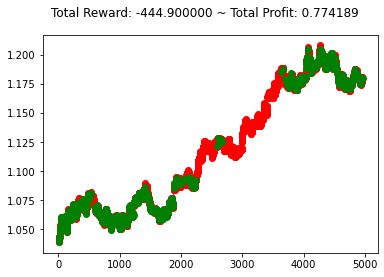

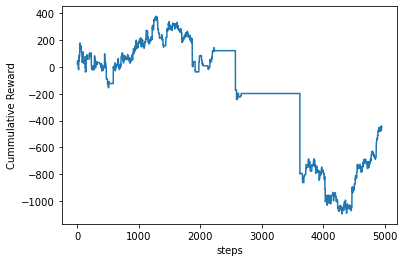

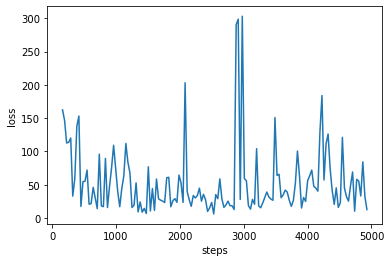

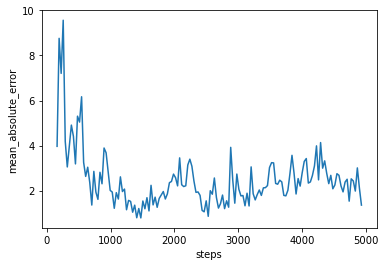

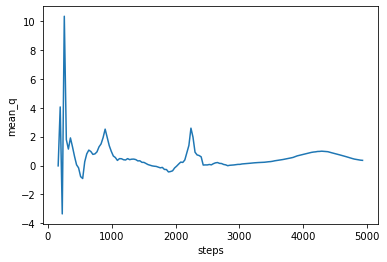

starting train 6
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 48s 49ms/step - reward: -29.8391 - cumulative_reward: 331.4213
train 6 completed. took 305.640 seconds, total_reward: 357.2000000001392 total_profit: 0.732512062084384
min reward: -128.39999999999964, max reward: 170.40000000000165, mean_reward: 0.07217619721158601


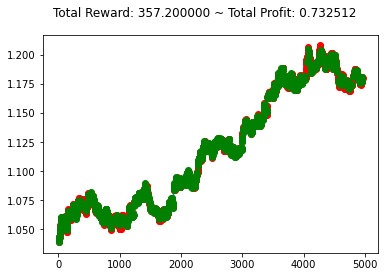

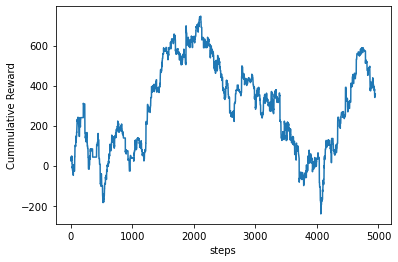

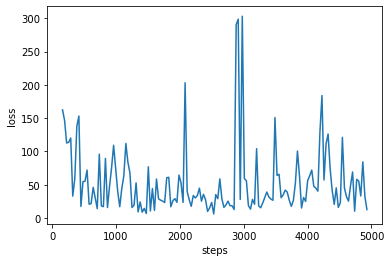

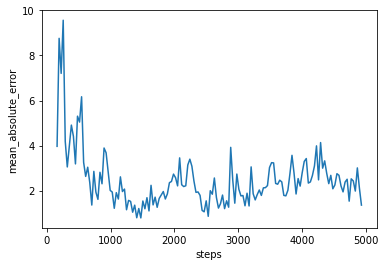

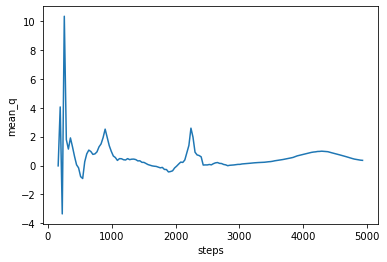

starting train 7
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 50s 50ms/step - reward: -11.8424 - cumulative_reward: -244.03346s - reward: -13.243
train 7 completed. took 360.458 seconds, total_reward: -140.90000000009067 total_profit: 0.7307534739636531
min reward: -180.79999999999873, max reward: 204.40000000000015, mean_reward: -0.028470398060232507


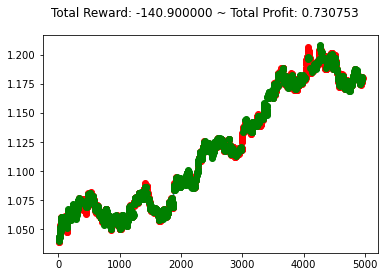

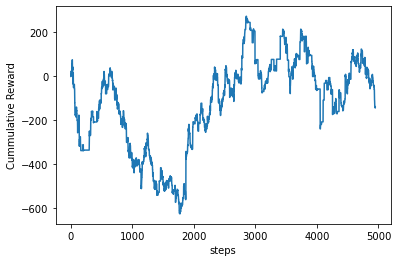

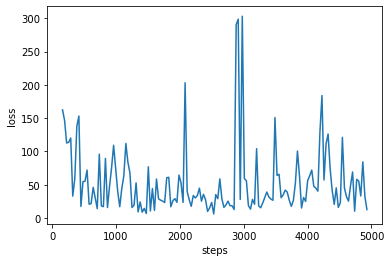

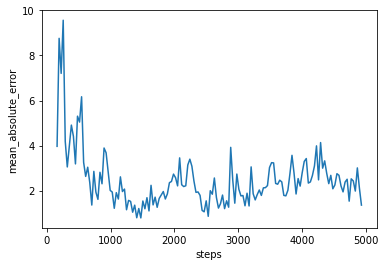

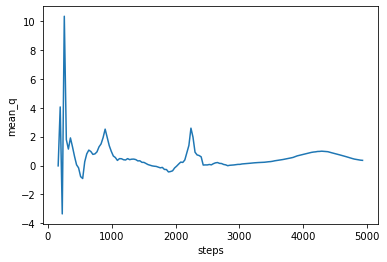

starting train 8
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 50s 51ms/step - reward: 3.9612 - cumulative_reward: 256.5826
train 8 completed. took 416.146 seconds, total_reward: 357.4999999999859 total_profit: 0.7256575558013785
min reward: -170.40000000000165, max reward: 126.29999999999919, mean_reward: 0.07223681551828368


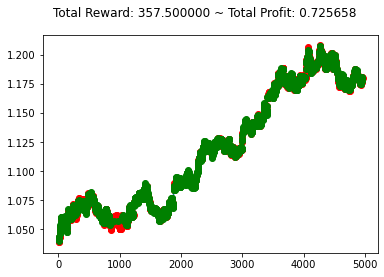

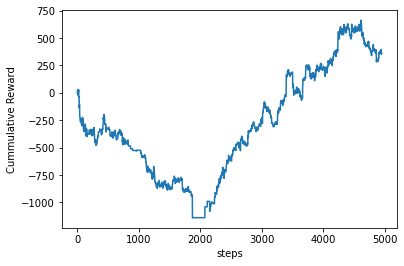

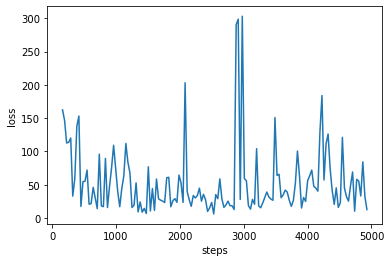

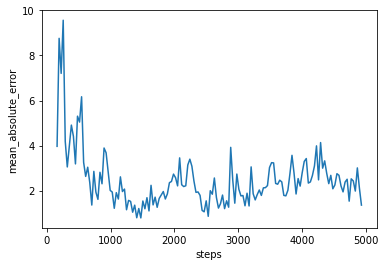

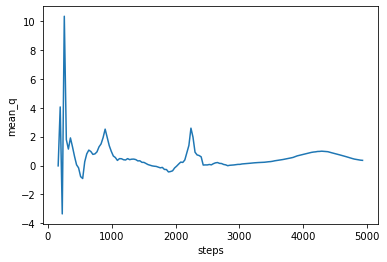

starting train 9
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 52s 52ms/step - reward: 13.9110 - cumulative_reward: 482.2760
train 9 completed. took 474.182 seconds, total_reward: 703.6999999999543 total_profit: 0.7858626097098143
min reward: -168.70000000000164, max reward: 179.10000000000093, mean_reward: 0.14219034148311868


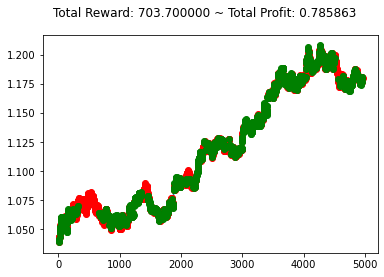

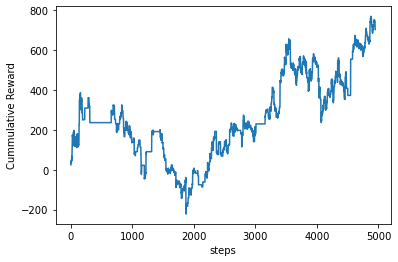

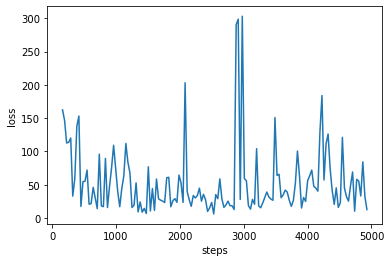

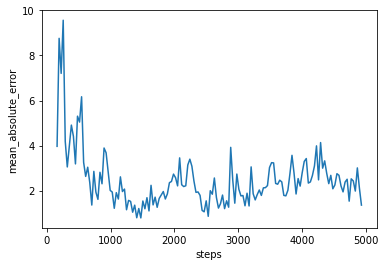

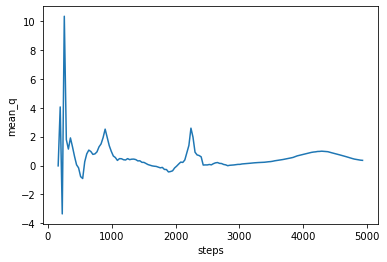

starting train 10
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 60s 61ms/step - reward: -0.3202 - cumulative_reward: -757.5718
train 10 completed. took 539.878 seconds, total_reward: -1009.7999999999379 total_profit: 0.701832430464852
min reward: -195.19999999999982, max reward: 128.39999999999964, mean_reward: -0.2040412204485629


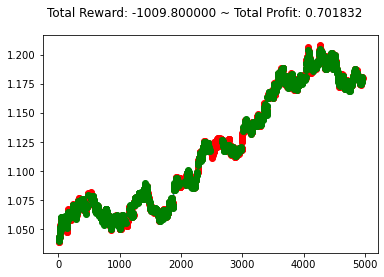

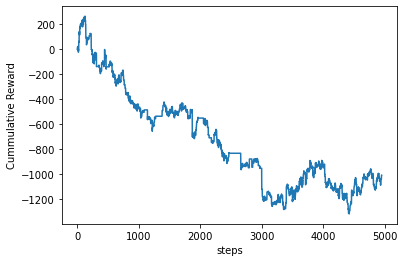

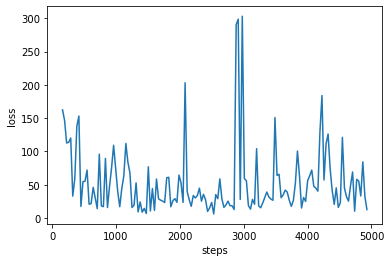

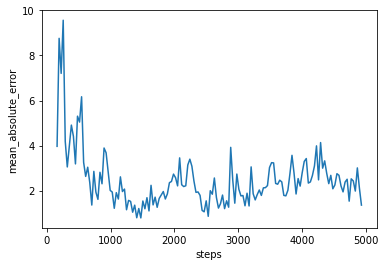

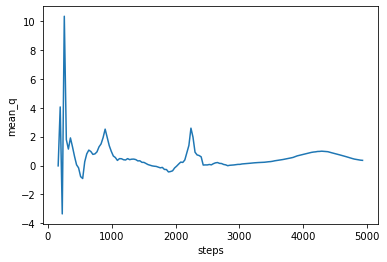

In [3]:
from evaluator import Evaluator

e = Evaluator(agent_creator, env_creator, name="dqn")
e.train(repeat=10)


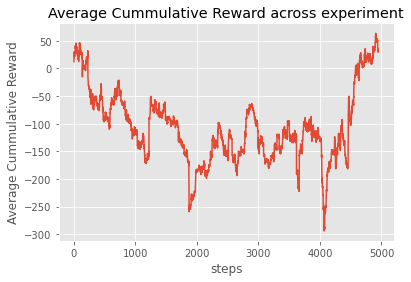

In [4]:
e.process_train_result()

Testing for 1 episodes ...
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
192/199 [===========================>..] - ETA: 0s - reward: 0.0000e+00 - cumulative_reward: 0.0000e+00Episode 1: reward: 0.000, steps: 999

test completed. total_reward: 0.0 total_profit: 1.0040589181323873
min reward: 0.0, max reward: 0.0, mean_reward: 0.0



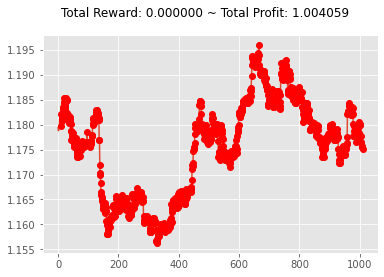

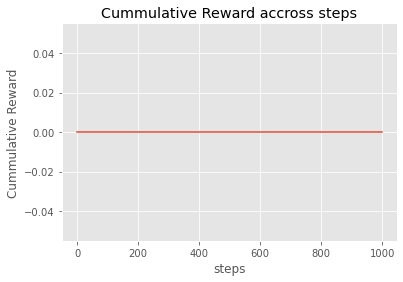

In [5]:
e.test(gym.make('forex-v0', frame_bound=(5000, 6000), window_size=10))

In [6]:
def agent_creator():
    #processor = EnvProcessor()
    processor = WhiteningNormalizerProcessor()
    memory = SequentialMemory(limit=1024, window_length=1)
    #policy = EpsGreedyQPolicy()
    policy = BoltzmannQPolicy()
    agent = DQNAgent(model=buildModel(), nb_actions=nb_actions, memory=memory, nb_steps_warmup=128, policy=policy, batch_size=64, processor=processor, 
                   target_model_update=1e-2, train_interval=32, enable_double_dqn=True)
    agent.compile(Adam(lr=0.01), metrics=['mae'])
    return agent

starting train 1
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 58s 59ms/step - reward: -17.4254 - cumulative_reward: 65.3708
train 1 completed. took 61.815 seconds, total_reward: 667.7000000000111 total_profit: 0.8110877661334622
min reward: -260.7000000000004, max reward: 168.70000000000164, mean_reward: 0.1349161446756943


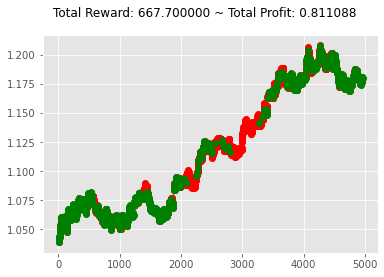

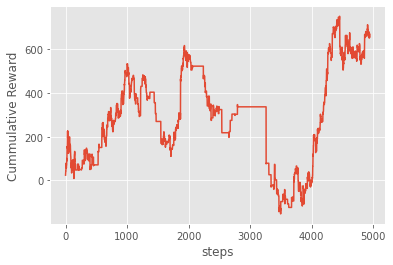

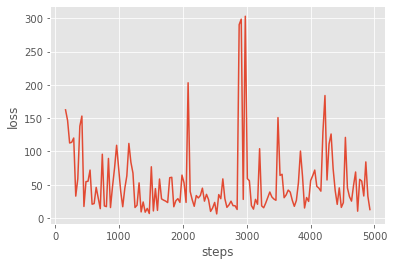

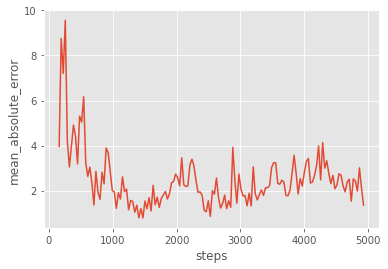

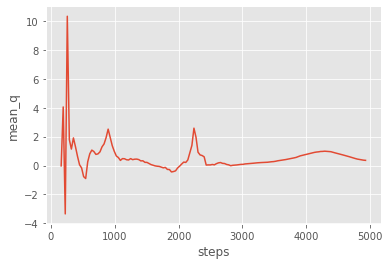

starting train 2
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 60s 61ms/step - reward: -2.5574 - cumulative_reward: -718.7162
train 2 completed. took 128.852 seconds, total_reward: -1442.4999999998422 total_profit: 0.6781166771739967
min reward: -104.99999999999955, max reward: 120.70000000000248, mean_reward: -0.29147302485347387


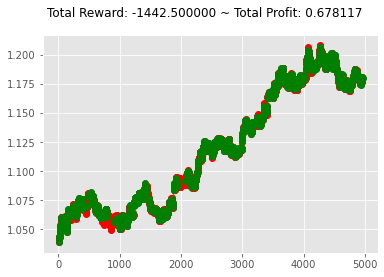

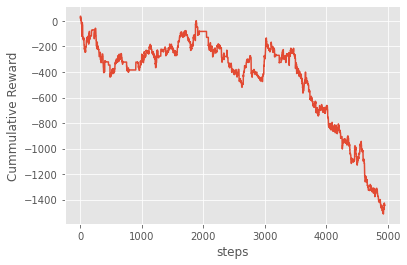

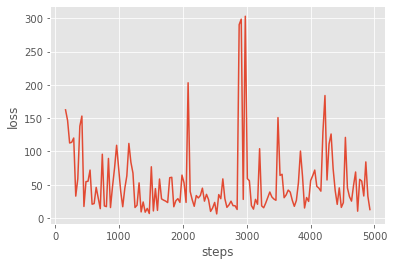

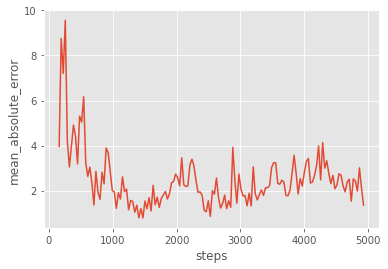

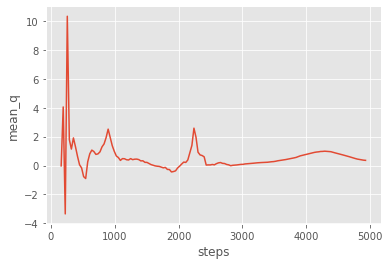

starting train 3
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 59s 59ms/step - reward: 11.4221 - cumulative_reward: 692.0639
train 3 completed. took 194.561 seconds, total_reward: 912.6999999999482 total_profit: 0.7849875335250377
min reward: -81.59999999999945, max reward: 194.9000000000023, mean_reward: 0.1844210951707311


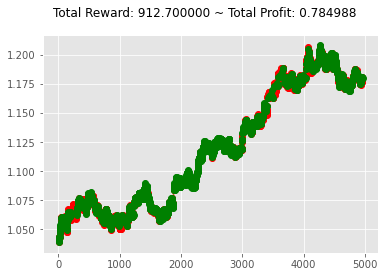

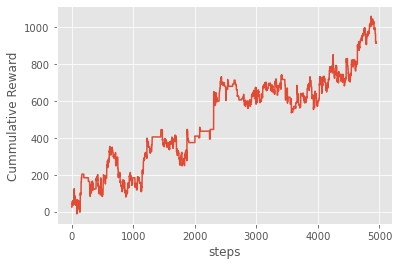

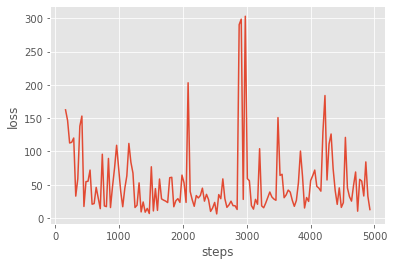

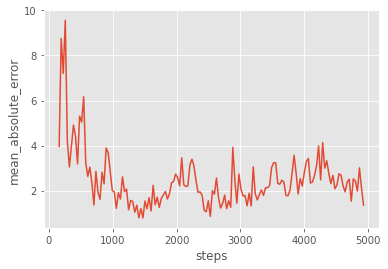

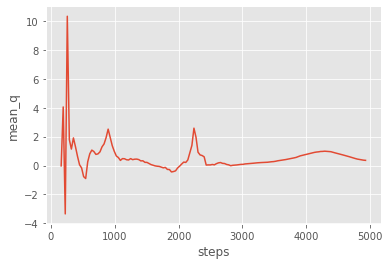

starting train 4
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 66s 66ms/step - reward: -28.2344 - cumulative_reward: 394.5626
train 4 completed. took 267.646 seconds, total_reward: 262.9000000000062 total_profit: 0.7268963988217348
min reward: -93.90000000000231, max reward: 233.60000000000048, mean_reward: 0.0531218427965258


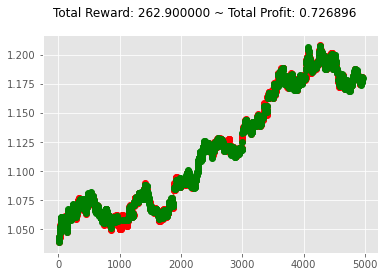

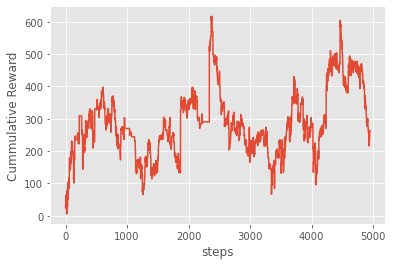

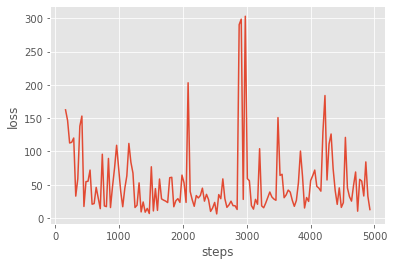

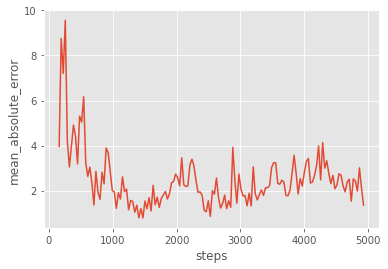

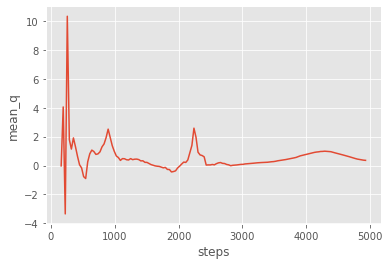

starting train 5
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 65s 66ms/step - reward: -1.2192 - cumulative_reward: -377.8580 10s - reward: -1.3327 - 
train 5 completed. took 340.906 seconds, total_reward: -1206.799999999973 total_profit: 0.7551961403722837
min reward: -655.2000000000003, max reward: 121.59999999999948, mean_reward: -0.24384724186703838


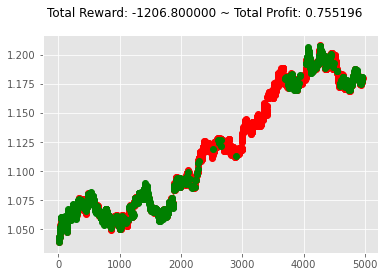

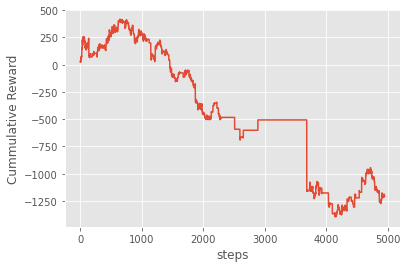

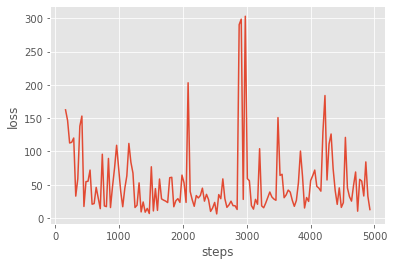

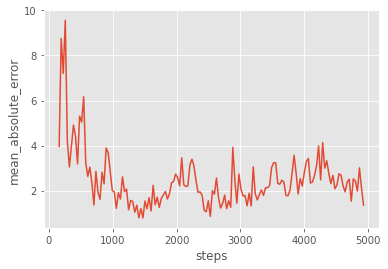

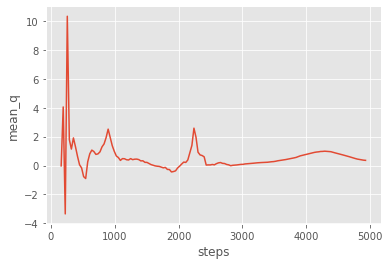

starting train 6
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 79s 79ms/step - reward: 7.2527 - cumulative_reward: 681.4914
train 6 completed. took 431.724 seconds, total_reward: 1239.8999999999796 total_profit: 0.7512497759737203
min reward: -105.20000000000084, max reward: 168.10000000000213, mean_reward: 0.25053546170943214


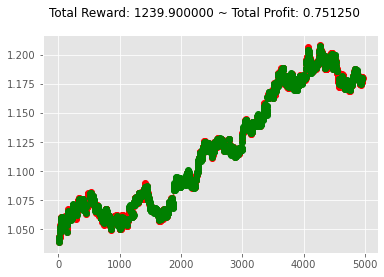

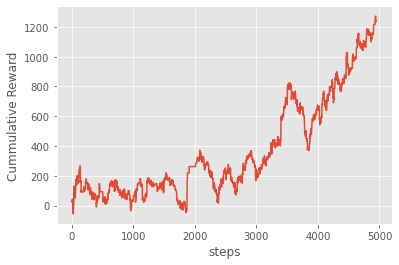

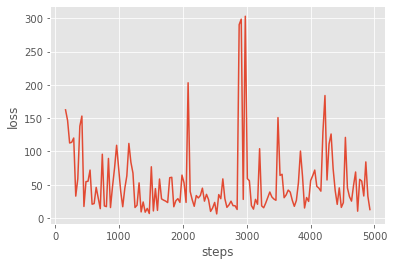

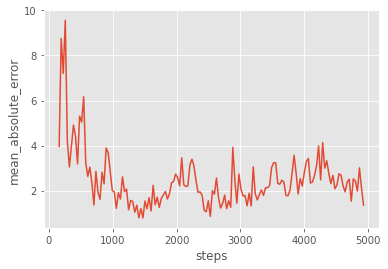

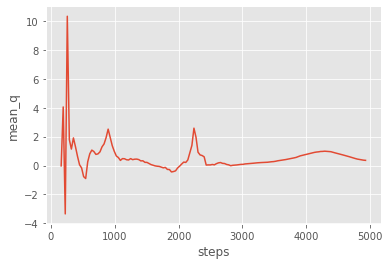

starting train 7
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 74s 75ms/step - reward: -1.0990 - cumulative_reward: -876.8071
train 7 completed. took 516.084 seconds, total_reward: -1087.8000000000236 total_profit: 0.7163583203250924
min reward: -152.49999999999986, max reward: 311.9999999999989, mean_reward: -0.21980198019802458


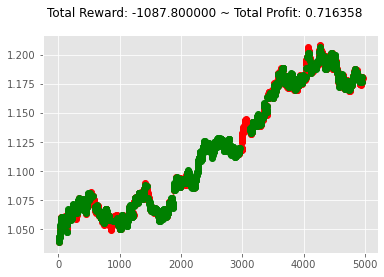

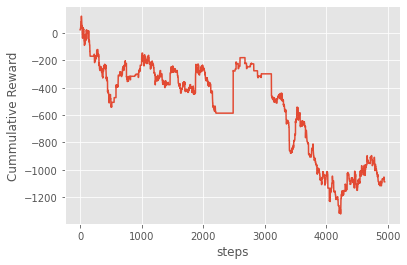

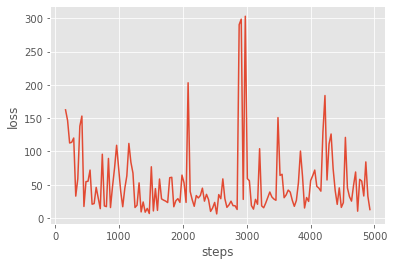

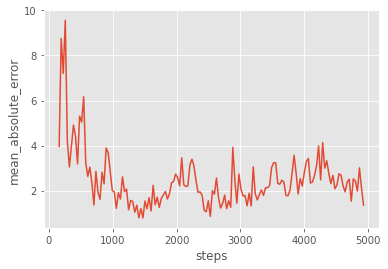

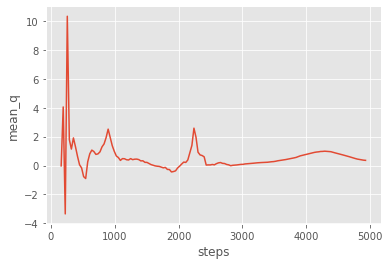

starting train 8
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 71s 72ms/step - reward: -14.4365 - cumulative_reward: -899.3276
train 8 completed. took 597.398 seconds, total_reward: -1223.9000000001051 total_profit: 0.710187218751812
min reward: -140.89999999999935, max reward: 116.19999999999963, mean_reward: -0.24730248535059712


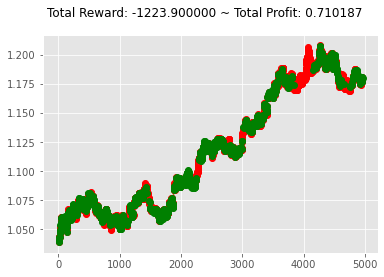

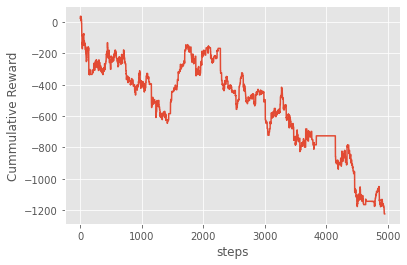

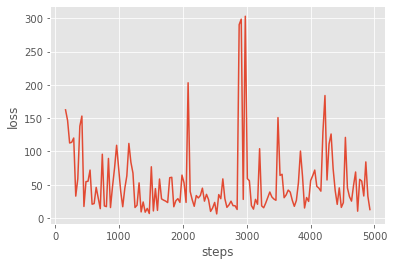

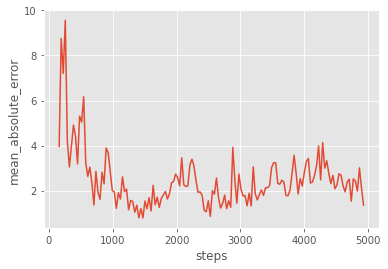

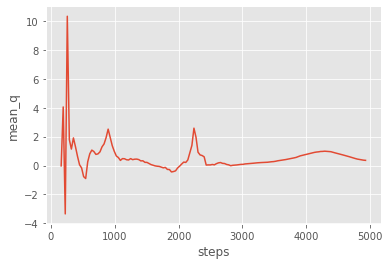

starting train 9
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 118s 119ms/step - reward: -9.5156 - cumulative_reward: 503.7082
train 9 completed. took 725.211 seconds, total_reward: 974.3999999999445 total_profit: 0.7771237282484463
min reward: -196.00000000000063, max reward: 191.59999999999843, mean_reward: 0.19688826025458567


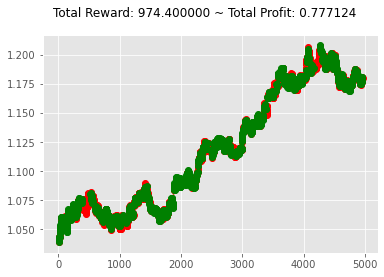

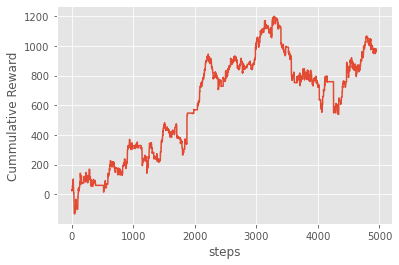

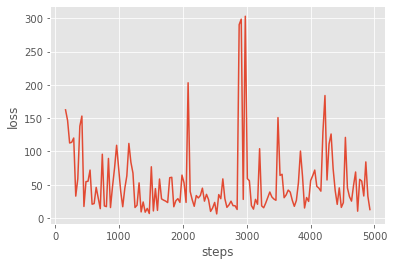

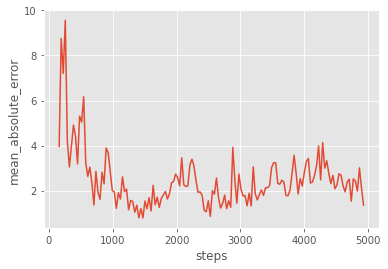

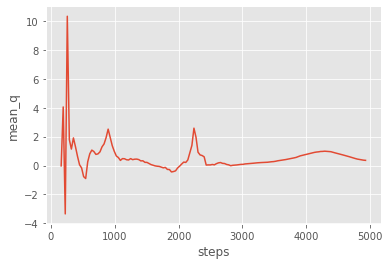

starting train 10
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 87s 88ms/step - reward: 14.0576 - cumulative_reward: -917.5803
train 10 completed. took 821.486 seconds, total_reward: -932.8000000001833 total_profit: 0.7003343745758247
min reward: -160.70000000000027, max reward: 168.70000000000164, mean_reward: -0.18848252172159696


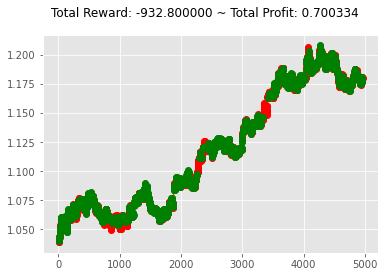

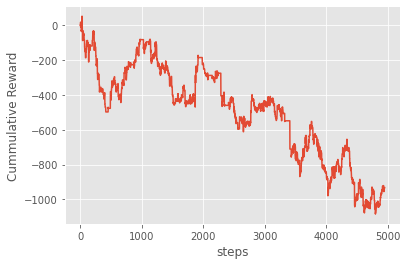

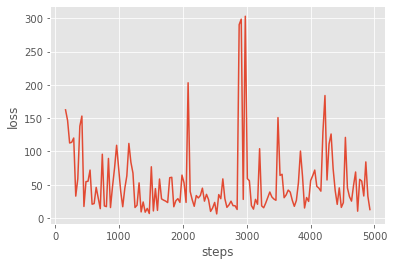

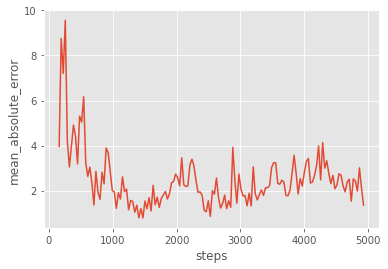

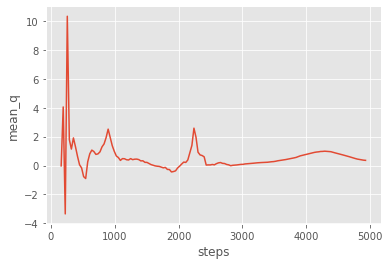

In [7]:
e = Evaluator(agent_creator, env_creator, name="doubledqn")
e.train(repeat=10)

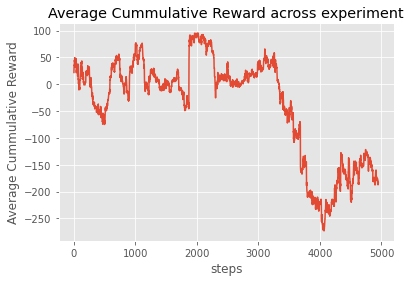

In [8]:
e.process_train_result()

Testing for 1 episodes ...
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
196/199 [============================>.] - ETA: 0s - reward: 0.0000e+00 - cumulative_reward: 0.0000e+00Episode 1: reward: 0.000, steps: 999

test completed. total_reward: 0.0 total_profit: 1.0040589181323873
min reward: 0.0, max reward: 0.0, mean_reward: 0.0



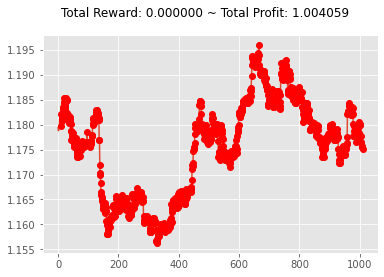

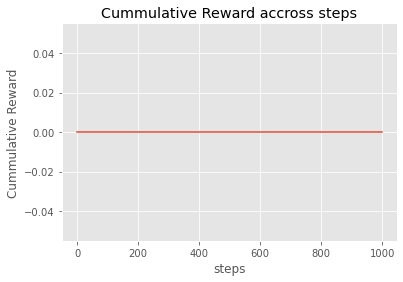

In [9]:
e.test(gym.make('forex-v0', frame_bound=(5000, 6000), window_size=10))

In [10]:
class CustomDQNAgent(DQNAgent):
    def __init__(self, *args, **kwargs):
        super(CustomDQNAgent, self).__init__(*args, **kwargs)
        self.average_reward = 0
    def backward(self, reward, terminal):
        #average reward update factor
        beta = 0.8  #for average reward
        # Store most recent experience in memory.
        if self.step % self.memory_interval == 0:
            self.memory.append(self.recent_observation, self.recent_action, reward, terminal,
                               training=self.training)

        metrics = [np.nan for _ in self.metrics_names]
        if not self.training:
            # We're done here. No need to update the experience memory since we only use the working
            # memory to obtain the state over the most recent observations.
            return metrics

        # Train the network on a single stochastic batch.
        if self.step > self.nb_steps_warmup and self.step % self.train_interval == 0:
            experiences = self.memory.sample(self.batch_size)
            assert len(experiences) == self.batch_size

            # Start by extracting the necessary parameters (we use a vectorized implementation).
            state0_batch = []
            reward_batch = []
            action_batch = []
            terminal1_batch = []
            state1_batch = []
            for e in experiences:
                state0_batch.append(e.state0)
                state1_batch.append(e.state1)
                reward_batch.append(e.reward)
                action_batch.append(e.action)
                terminal1_batch.append(0. if e.terminal1 else 1.)

            # Prepare and validate parameters.
            state0_batch = self.process_state_batch(state0_batch)
            state1_batch = self.process_state_batch(state1_batch)
            terminal1_batch = np.array(terminal1_batch)
            reward_batch = np.array(reward_batch)
            assert reward_batch.shape == (self.batch_size,)
            assert terminal1_batch.shape == reward_batch.shape
            assert len(action_batch) == len(reward_batch)

            # Compute Q values for mini-batch update.
            if self.enable_double_dqn:
                # According to the paper "Deep Reinforcement Learning with Double Q-learning"
                # (van Hasselt et al., 2015), in Double DQN, the online network predicts the actions
                # while the target network is used to estimate the Q value.
                q_values = self.model.predict_on_batch(state1_batch)
                assert q_values.shape == (self.batch_size, self.nb_actions)
                actions = np.argmax(q_values, axis=1)
                assert actions.shape == (self.batch_size,)

                # Now, estimate Q values using the target network but select the values with the
                # highest Q value wrt to the online model (as computed above).
                target_q_values = self.target_model.predict_on_batch(state1_batch)
                target_q0_values = self.target_model.predict_on_batch(state0_batch)  #for average reward
                assert target_q_values.shape == (self.batch_size, self.nb_actions)
                q_batch = target_q_values[range(self.batch_size), actions]
                q0_batch = target_q0_values[range(self.batch_size), actions] #for average reward
            else:
                # Compute the q_values given state1, and extract the maximum for each sample in the batch.
                # We perform this prediction on the target_model instead of the model for reasons
                # outlined in Mnih (2015). In short: it makes the algorithm more stable.
                target_q_values = self.target_model.predict_on_batch(state1_batch)
                target_q0_values = self.target_model.predict_on_batch(state0_batch) #for average reward
                assert target_q_values.shape == (self.batch_size, self.nb_actions)
                q_batch = np.max(target_q_values, axis=1).flatten()
                q0_batch = target_q0_values[range(self.batch_size), actions] #for average reward
            assert q_batch.shape == (self.batch_size,)

            targets = np.zeros((self.batch_size, self.nb_actions))
            dummy_targets = np.zeros((self.batch_size,))
            masks = np.zeros((self.batch_size, self.nb_actions))

            # Compute r_t + gamma * max_a Q(s_t+1, a) and update the target targets accordingly,
            # but only for the affected output units (as given by action_batch).
            #discounted_reward_batch = self.gamma * q_batch
            not_discounted_reward_batch = q_batch #for average reward
            delta_batch = reward_batch - np.full(reward_batch.shape[0], self.average_reward) + q_batch - q0_batch #for average reward
            delta = np.sum(delta_batch) #for average reward
            
            
            # Set discounted reward to zero for all states that were terminal.
            #discounted_reward_batch *= terminal1_batch
            assert not_discounted_reward_batch.shape == reward_batch.shape
            #Rs = reward_batch + discounted_reward_batch
            Rs = reward_batch - np.full(reward_batch.shape[0], self.average_reward) + not_discounted_reward_batch #for average reward modified
            for idx, (target, mask, R, action) in enumerate(zip(targets, masks, Rs, action_batch)):
                target[action] = R  # update action with estimated accumulated reward
                dummy_targets[idx] = R
                mask[action] = 1.  # enable loss for this specific action
            targets = np.array(targets).astype('float32')
            masks = np.array(masks).astype('float32')

            # Finally, perform a single update on the entire batch. We use a dummy target since
            # the actual loss is computed in a Lambda layer that needs more complex input. However,
            # it is still useful to know the actual target to compute metrics properly.
            ins = [state0_batch] if type(self.model.input) is not list else state0_batch
            metrics = self.trainable_model.train_on_batch(ins + [targets, masks], [dummy_targets, targets])
            self.average_reward += beta * delta #for average reward
            metrics = [metric for idx, metric in enumerate(metrics) if idx not in (1, 2)]  # throw away individual losses
            metrics += self.policy.metrics
            if self.processor is not None:
                metrics += self.processor.metrics

        if self.target_model_update >= 1 and self.step % self.target_model_update == 0:
            self.update_target_model_hard()

        return metrics    

starting train 1
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 136s 137ms/step - reward: -0.9581 - cumulative_reward: -1135.1354
train 1 completed. took 141.598 seconds, total_reward: -948.3000000000092 total_profit: 0.8420551314818887
min reward: -180.499999999999, max reward: 168.70000000000164, mean_reward: -0.19161446756920775


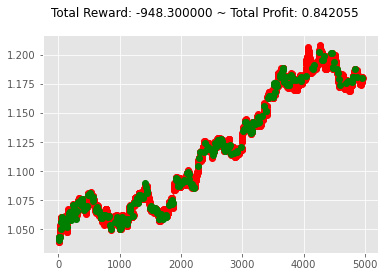

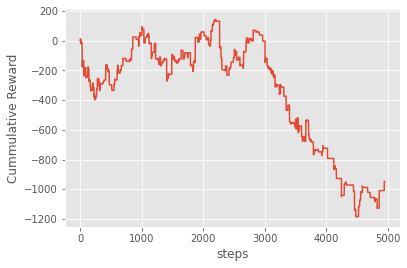

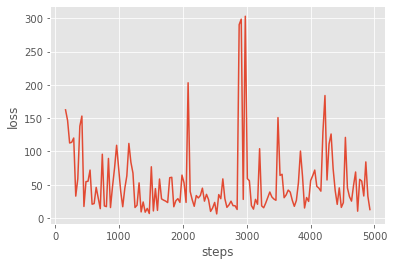

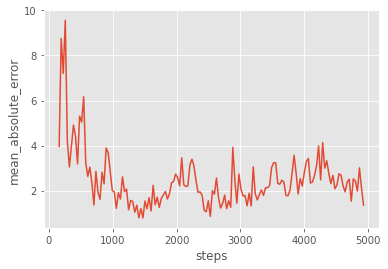

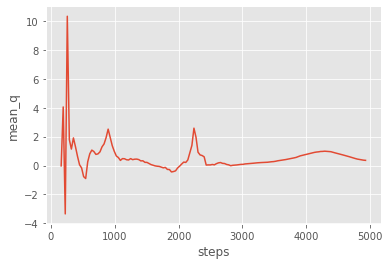

starting train 2
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 140s 141ms/step - reward: -0.6523 - cumulative_reward: -579.1547s - reward: -0.6575 - cumulative_reward: -578.
train 2 completed. took 293.611 seconds, total_reward: -645.5999999999885 total_profit: 0.8520377799416029
min reward: -235.60000000000025, max reward: 144.09999999999812, mean_reward: -0.13045059608001386


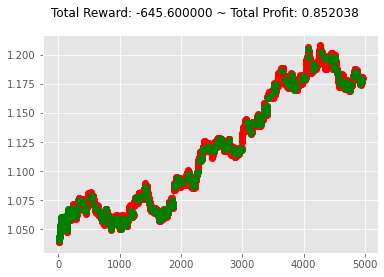

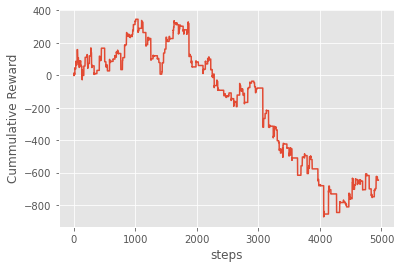

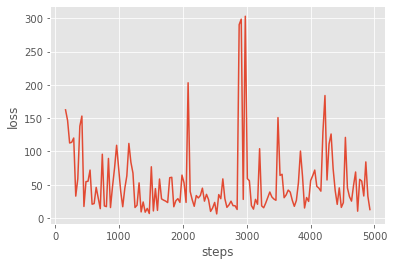

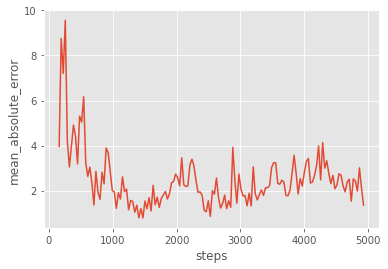

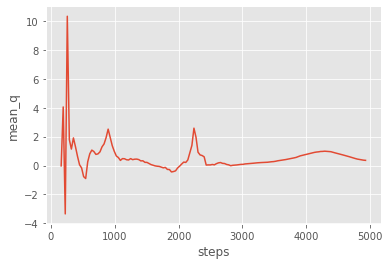

starting train 3
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 167s 168ms/step - reward: -0.9262 - cumulative_reward: -684.4310
train 3 completed. took 472.268 seconds, total_reward: -916.799999999963 total_profit: 0.8313520550668624
min reward: -179.60000000000198, max reward: 133.99999999999858, mean_reward: -0.18524954536269206


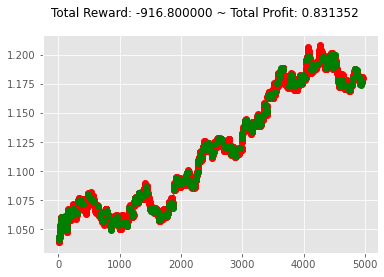

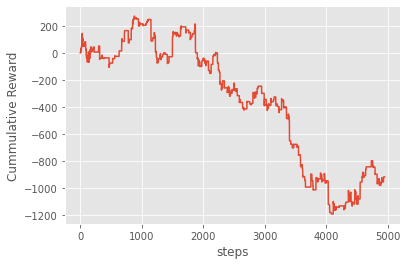

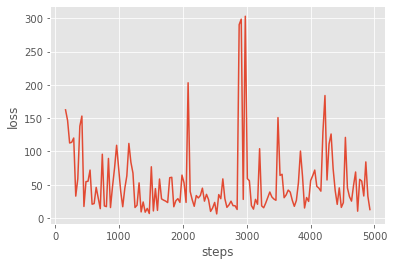

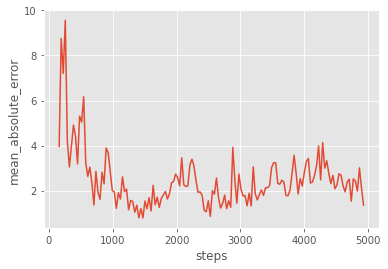

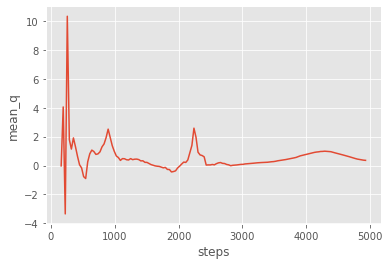

starting train 4
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 84s 85ms/step - reward: -15.7503 - cumulative_reward: -374.0010
train 4 completed. took 569.589 seconds, total_reward: -544.6999999999779 total_profit: 0.8553414053967829
min reward: -157.8999999999997, max reward: 174.00000000000082, mean_reward: -0.11006263891694845


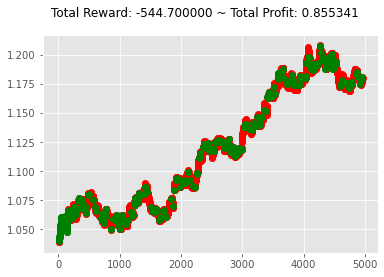

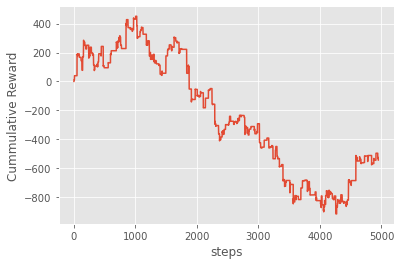

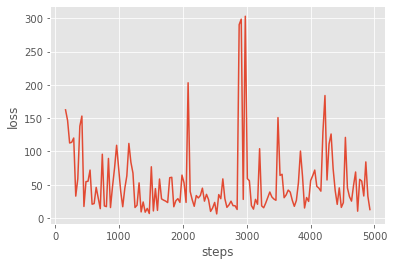

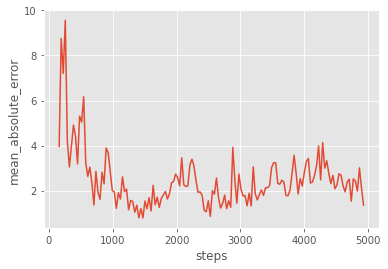

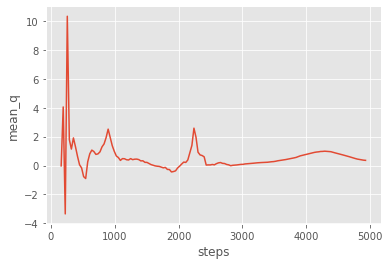

starting train 5
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 88s 89ms/step - reward: -1.6187 - cumulative_reward: -1034.9910
train 5 completed. took 668.648 seconds, total_reward: -1602.199999999994 total_profit: 0.8159075245152803
min reward: -166.09999999999792, max reward: 110.800000000002, mean_reward: -0.32374217013537965


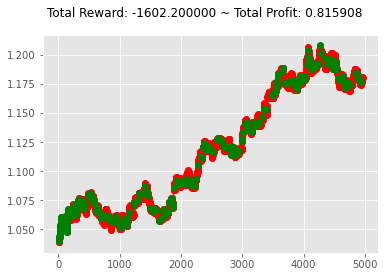

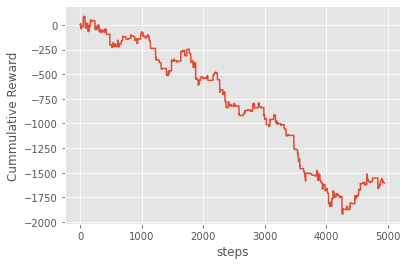

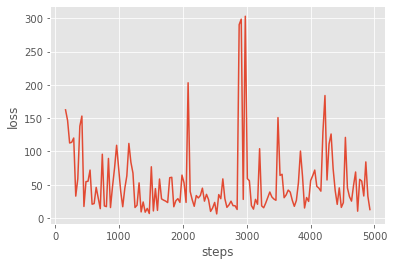

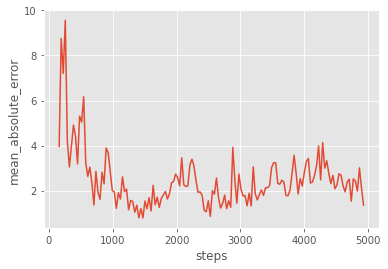

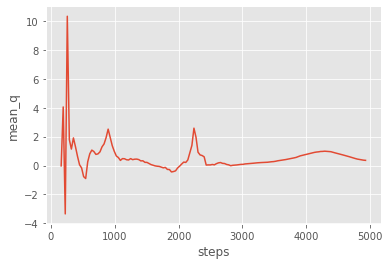

starting train 6
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 85s 86ms/step - reward: -0.3285 - cumulative_reward: -284.1602
train 6 completed. took 770.072 seconds, total_reward: -325.1000000000244 total_profit: 0.8645221594118789
min reward: -174.90000000000006, max reward: 200.29999999999993, mean_reward: -0.06569003839159919


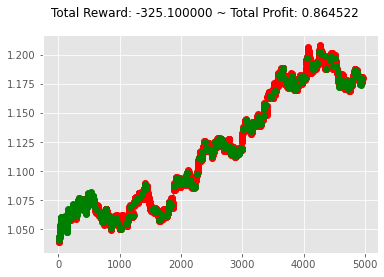

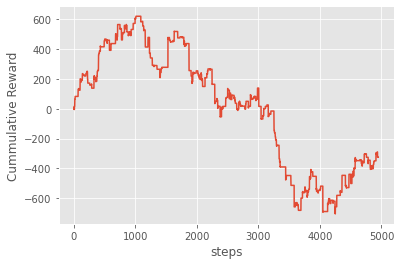

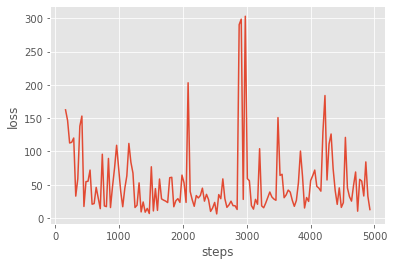

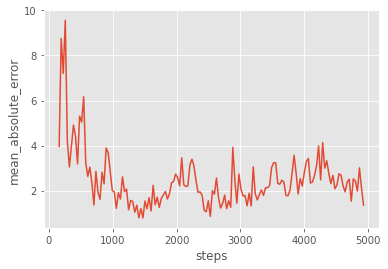

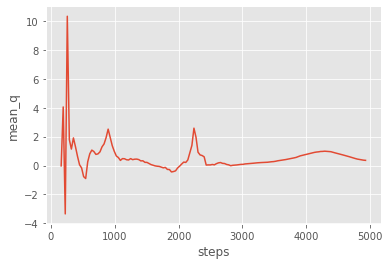

starting train 7
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 84s 85ms/step - reward: -0.5590 - cumulative_reward: -658.4341
train 7 completed. took 866.506 seconds, total_reward: -553.2999999999967 total_profit: 0.8627473676568053
min reward: -229.69999999999936, max reward: 168.70000000000164, mean_reward: -0.1118003637098397


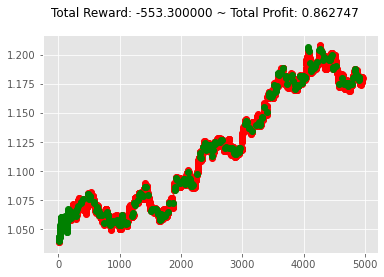

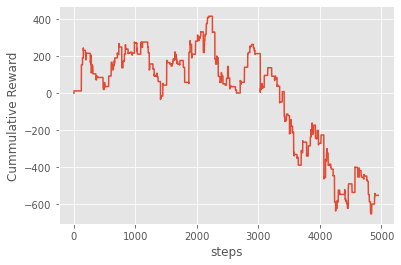

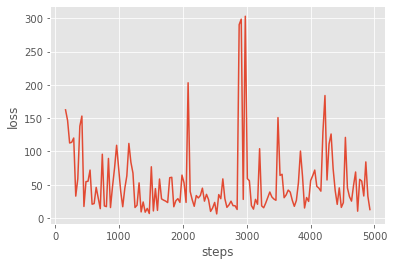

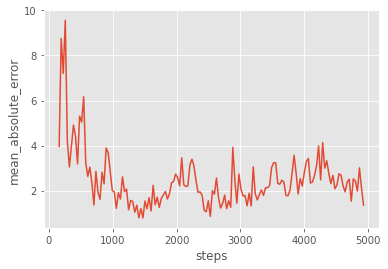

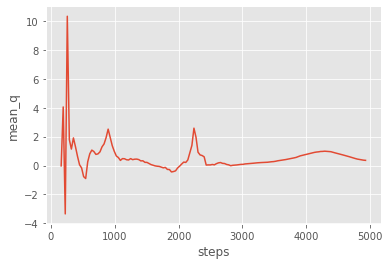

starting train 8
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 81s 82ms/step - reward: 21.2918 - cumulative_reward: -700.2788
train 8 completed. took 959.530 seconds, total_reward: -799.9999999999247 total_profit: 0.8500883447979086
min reward: -252.49999999999994, max reward: 126.59999999999894, mean_reward: -0.1616488179430036


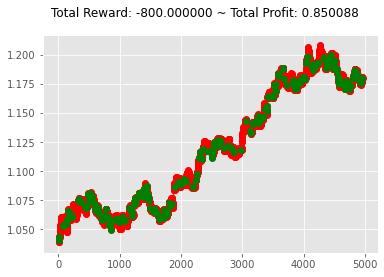

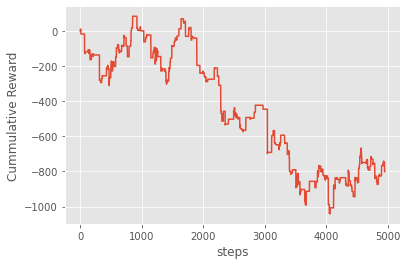

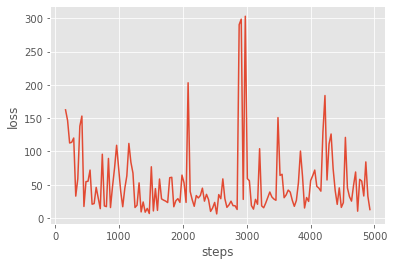

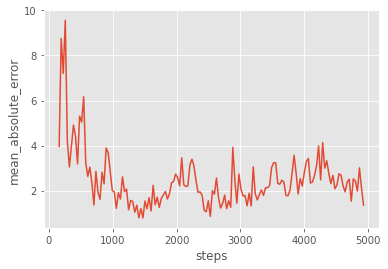

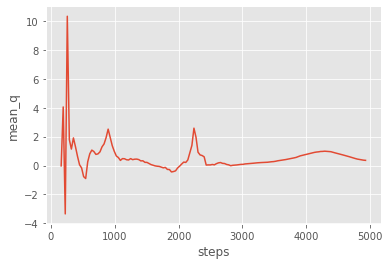

starting train 9
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - 81s 81ms/step - reward: -0.9619 - cumulative_reward: -712.3537
train 9 completed. took 1052.112 seconds, total_reward: -952.100000000027 total_profit: 0.851279106798195
min reward: -266.80000000000035, max reward: 178.8999999999996, mean_reward: -0.1923822994544407


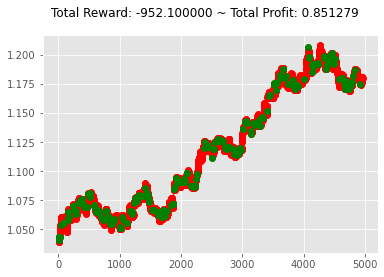

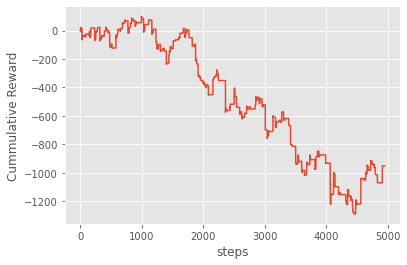

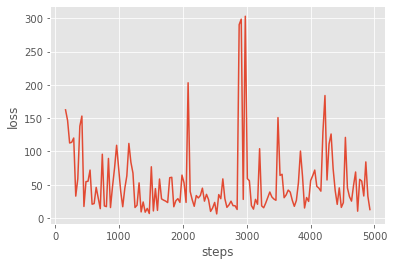

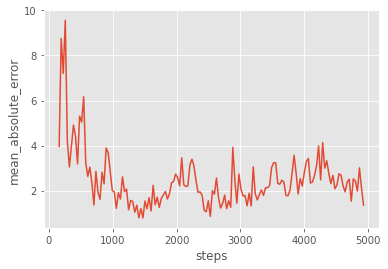

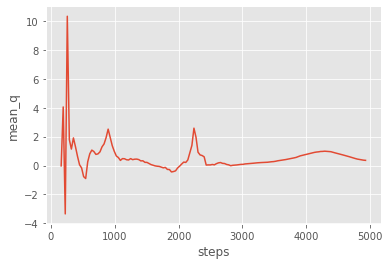

starting train 10
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
989/989 [==============================] - ETA: 0s - reward: -0.8803 - cumulative_reward: -661.180 - 97s 98ms/step - reward: -0.8786 - cumulative_reward: -661.6019
train 10 completed. took 1161.605 seconds, total_reward: -869.5999999999565 total_profit: 0.8475638824442999
min reward: -193.00000000000094, max reward: 135.49999999999952, mean_reward: -0.17571226510405263


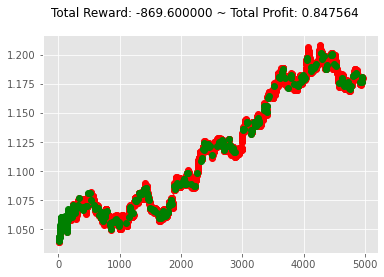

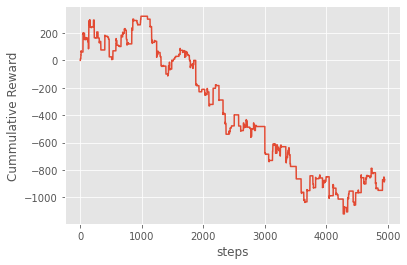

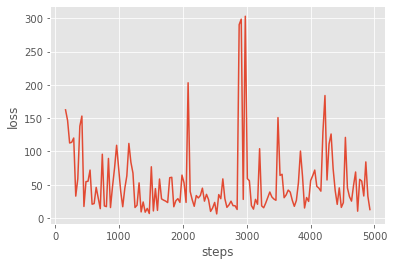

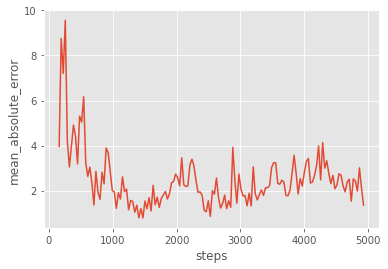

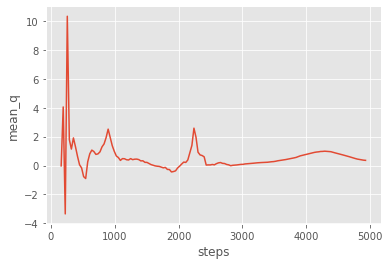

In [11]:
def agent_creator():
    #processor = EnvProcessor()
    processor = WhiteningNormalizerProcessor()
    memory = SequentialMemory(limit=1024, window_length=1)
    policy = EpsGreedyQPolicy()
    #policy = BoltzmannQPolicy()
    agent = CustomDQNAgent(model=buildModel(), nb_actions=nb_actions, memory=memory, nb_steps_warmup=128, policy=policy, batch_size=64, processor=processor, 
                   target_model_update=1e-2, train_interval=32, enable_double_dqn=True)
    agent.compile(Adam(lr=0.01), metrics=['mae'])
    return agent
e = Evaluator(agent_creator, env_creator, name="averagedqn")
e.train(repeat=10)


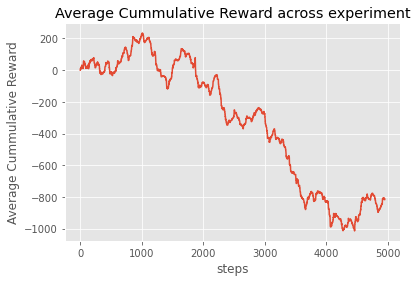

Testing for 1 episodes ...
------------------ new episode begin, environment reset -----------------------------
Interval 1.0 (0 steps performed)
198/199 [============================>.] - ETA: 0s - reward: 0.0000e+00 - cumulative_reward: 0.0000e+00Episode 1: reward: 0.000, steps: 999

test completed. total_reward: 0.0 total_profit: 1.0040589181323873
min reward: 0.0, max reward: 0.0, mean_reward: 0.0



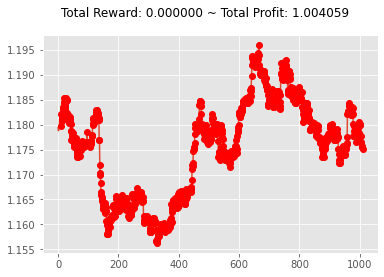

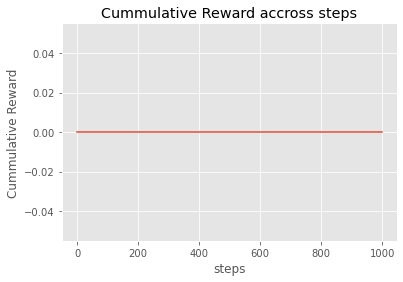

In [12]:
e.process_train_result()
e.test(gym.make('forex-v0', frame_bound=(5000, 6000), window_size=10))